In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw1.ipynb")

## Homework #1

*Please edit the cell below to add your full name (first and last) and the full names of any group members that you collaborated with on this assignment.* 

Name: Runze Li   
Group Members: None   
***

In [2]:
# Set random seed and ensure plots are displayed in the notebook
import numpy as np
np.random.seed(5)
%matplotlib inline

<!-- BEGIN QUESTION -->

**Question 1 (20 points).** In lecture, we considered an outcome from the globe tossing experiment with 6 water and 3 land observations. Suppose the globe tossing data had turned out to be 4 water observations and 11 land observations. Compute **and plot** the posterior distribution evaluating the posterior distribution for this data using grid sizes of 5, 10, 25, and 50 points. Create plots with separate x- and y-axis to make your visualizations clear. Feel free to use the function (`posterior_grid_approx`) defined in lecture for computing your posterior distribution.

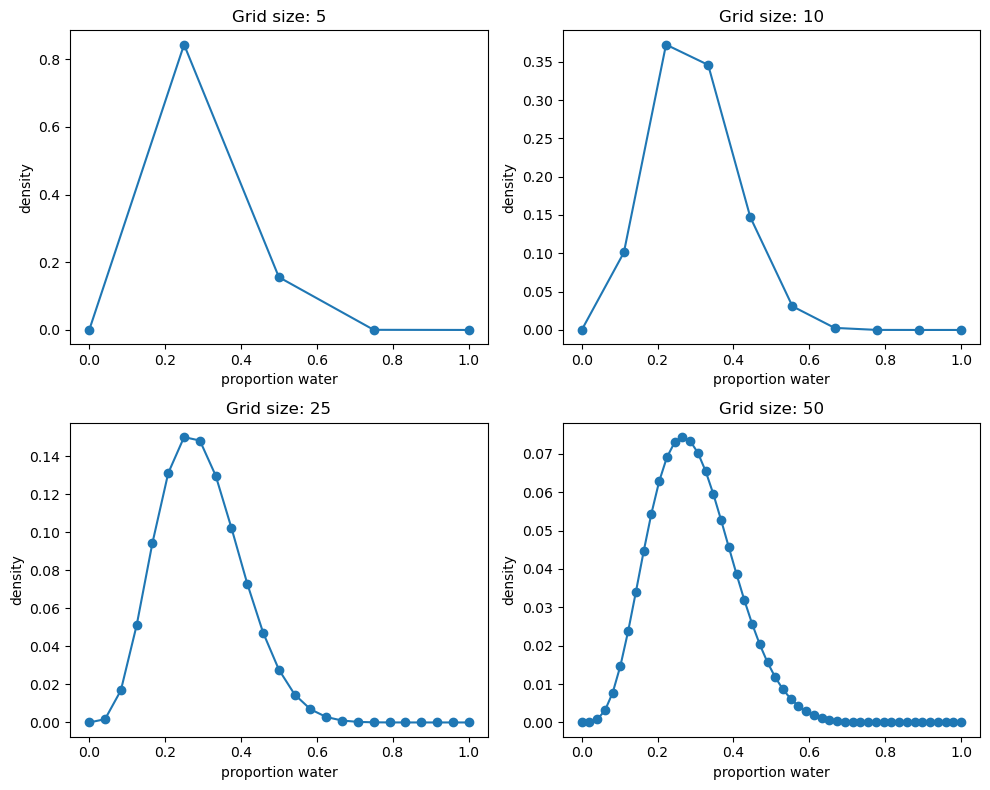

In [3]:
# Write code here

# import
from scipy import stats
import seaborn as sns
import pandas as pd
from matplotlib import animation, pyplot as plt

def posterior_grid_approx(grid_points=5, success=4, tosses=15):
    
    # define grid (grid_points number of values evenly spaced between 0 and 1)
    p_grid = np.linspace(0, 1, grid_points)

    # define prior (grid_points number of values all equal to 5)
    prior = np.repeat(5, grid_points)  # uniform

    # compute probability of data at each point in the grid
    likelihood = stats.binom.pmf(success, tosses, p_grid)

    # compute product of likelihood and prior
    unorm_posterior = likelihood * prior

    # normalize the posterior, so it sums to 1
    posterior = unorm_posterior / unorm_posterior.sum()
    
    # provides the grid of points and the posterior value for each one
    return p_grid, posterior

def plot_posteriors(success, tosses):
    grid_sizes = [5, 10, 25, 50]
    
    plt.figure(figsize=(10, 8))
    
    for i, grid_size in enumerate(grid_sizes):
        p_grid, posterior = posterior_grid_approx(grid_size, success, tosses)
        
        # Create a new subplot for each grid size
        plt.subplot(2, 2, i + 1)
        plt.plot(p_grid, posterior, '-o')
        plt.title(f'Grid size: {grid_size}')
        plt.xlabel('proportion water')
        plt.ylabel('density')
    
    plt.tight_layout()
    plt.show()

# Parameters for the new experiment
success = 4  # 4 water observations
tosses = 15  # 4 water + 11 land

# Plot the posteriors for the given data
plot_posteriors(success, tosses)

Based on your plots, answer the following question:

How has the posterior changed using these observations (4 W, 11 L) relative to the example of this problem from lecture? **Be sure to comment on what the change in the posterior implies for our estimate of the proportion of water on Earth.**  *Use a uniform prior for this problem.*

__Answer:__

In the lecture, we observed 6 W and 3 L. Due to the large number of water observations, the peak position is near 0.6, which means that the estimate of the proportion of water on earth is high. But in this new data, we observed 4 W and 11 L. The peak appears at a lower value, which is between 0.2 and 0.3. This indicates that the estimate of the proportion  of water on earth is lower based on the new data.

In conclusion, the posterior distribution in the new experiments shows that our estimate of the proportion of water on earth has dropped significantly, and the data is more centered in the range of 0.2 and 0.3.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 2 (12 points).** Now suppose the data are 4 water observations and 2 land observations. Compute the posterior again (for 5, 10, 25, and 50 grid points), but this time use a prior assigning 0 plausibility to values below p = 0.5 and a constant measure of plausibility for values above p = 0.5. This corresponds to prior information that a majority of the Earth’s surface is water. (You can find example code for how to compute such a prior in the Python code on JupyterHub that corresponds to Chapter 2 of the textbook. Part of the goal of this problem is for you to familiarize yourself with how to access the textbook and the accompanying code.)  

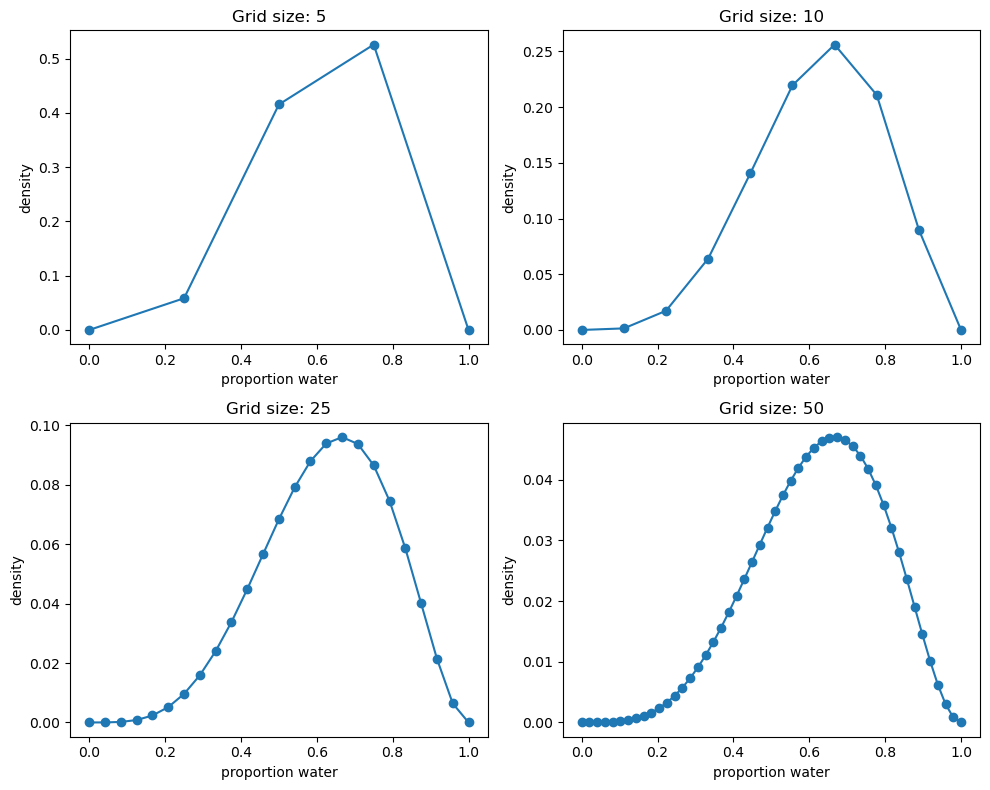

In [4]:
# Write code here
def truncated_posterior_grid_approx(grid_points=5, success=4, tosses=6):
    # define grid (grid_points number of values evenly spaced between 0 and 1)
    p_grid = np.linspace(0, 1, grid_points)
    
    # truncated: this time use a prior assigning 0 plausibility to values below p = 0.5 and a constant measure of plausibility for values above p = 0.5.
    prior = (p_grid >= 0.5).astype(int)
    
    # compute probability of data at each point in the grid
    likelihood = stats.binom.pmf(success, tosses, p_grid)
    
    # compute product of likelihood and prior
    unorm_posterior = likelihood * prior
    
    # normalize the posterior, so it sums to 1
    posterior = unorm_posterior / unorm_posterior.sum()

    # provides the grid of points and the posterior value for each one
    return p_grid, posterior

def plot_truncated_posteriors(success, tosses):
    grid_sizes = [5, 10, 25, 50]
    
    plt.figure(figsize=(10, 8))
    
    for i, grid_size in enumerate(grid_sizes):
        p_grid, posterior = posterior_grid_approx(grid_size, success, tosses)
        
        # Create a new subplot for each grid size
        plt.subplot(2, 2, i + 1)
        plt.plot(p_grid, posterior, '-o')
        plt.title(f'Grid size: {grid_size}')
        plt.xlabel('proportion water')
        plt.ylabel('density')
    
    plt.tight_layout()
    plt.show()

# Parameters for the new experiment
success = 4  # 4 water observations
tosses = 6   # 4 water + 2 land

# Plot the posteriors for the given data
plot_posteriors(success, tosses)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

Answer the following questions based on your new posterior plots:

**Be sure to explicitly compare the posterior plots from Question 1 to those from this problem when providing your written answers.**

a) How do the grid-approximated posterior distributions compare to those generated in Question 1?   

__Answer:__

Compare:
1. Changes in shape:

   In Question 1, the posterior distribution covers the entire range from 0 to 1, and the shape of the distribution is smoother and more precise as the number of grid points increase. In this problem, a truncated prior is used where the values of $p<0.5$ are not feasible and those of $p>=0.5$ are considered as constant values. Therefore, all posterior probabilities for $p<0.5$ are 0, and the distribution rises near $p=0.5$ and it continues to distribute above 0.5.
   
2. Change in peak position:

    In Question 1, the posterior distribution peaked between 0.2 and 0.3. In this problem, the posterior distribution peaks at around $p=0.6$ and no longer contains any values below 0.5.

In conclusion, the posterior distribution in Question 1 is wider and covers all possible values from 0 to 1, especially for lower p values, while in this problem, after using the truncated prior, the posterior distribution becomes very biased towards $p>=0.5$, completely excluding the possibility of values below 0.5.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b) What would you infer from this outcome (4 water, 2 land) about how much of the Earth is covered by water compared to the example considered in Question 1? *You can disregard the differences in the prior used when answering this question. Just base your answer on the posterior plots.*  

__Answer:__

In question 1, the observation is 4 W and 11 L, so the shape of the posterior distribution suggests that the proportion of the earth's surface covered by water is estimated to be relatively small, with the peak of the posterior distribution concentrated between 0.2 and 0.3. In question 2, the observation is 4 W and 2 L. The shape suggests that the proportion of earth's surface is relatively larger, where we can find that the peak is between 0.6 and 0.7.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 3 (18 points)**. For the posterior distribution from Question 2 (using a **grid of 100 points**) compute 89% percentile and 89% Highest Posterior Density (HPD) intervals for the posterior predictive distribution. (Example code for computing these intervals can be found within Chapter 3's Python code for *Statistical Rethinking, 2nd Edition* available through the JupyterHub site for this course. Again, one goal of this question is to get you familiar with accessing the textbook and associated Python code). **Sample 1000 points** from the posterior distribution to construct the posterior predictive distribution.

In [5]:
# Write code here

import arviz as az

grid_points = 100
success = 4
tosses = 6
n_samples = 1000

p_grid, posterior = truncated_posterior_grid_approx(grid_points, success, tosses)
samples = np.random.choice(p_grid, p=posterior, size=n_samples, replace=True)

pi = np.percentile(samples, [5.5, 94.5])
print(f"89% Percentile Interval (PI): {pi}")

hpdi = az.hdi(samples, hdi_prob=0.89)
print(f"89% Highest Posterior Density Intervals (HPDI): {hpdi}")

89% Percentile Interval (PI): [0.52525253 0.86868687]
89% Highest Posterior Density Intervals (HPDI): [0.50505051 0.83838384]


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

Answer the following questions: 

a) Compare the widths of these intervals. Between the 89% percentile and 89% HPD intervals of the posterior predictive distribution, which is wider? Why? *You'll want to consider what these intervals represent with respect to the posterior predictive distribution for which they are computed.*

__Answer:__

Width of intervals:

- 89% percentile interval: [0.52525253, 0.86868687], width = 0.34343434
- 89% highest posterior density interval: [0.50505051, 0.83838384], width = 0.33333333

So we can find that the width of 89% PI is wider than that of 89% HPDI.

Reasons: PI doesn't pay attention to the density of the posterior distribution and only calculates based on the cumulative probability, while HPDI focuses on maximizing the inclusion of high-density areas, which will make the interval more compact.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b) If you had only the information in these intervals (instead of the full posterior distribution), what might you misunderstand about the shape of the posterior distribution? 

__Answer:__

If we only look at two intervals without the posterior distribution, we may assume that the posterior distribution is symmetric and ignore the shape of the distribution. Secondly, we will misunderstand the relative importance of high density area and low density area in the posterior distribution.

In [6]:
grader.check("q3.b")

q3.b results: All test cases passed!

<!-- END QUESTION -->



## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)